In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Llamada a la API sería: https://archive-api.open-meteo.com/v1/archive?latitude=40.7143&longitude=-74.006&start_date=2021-01-01&end_date=2023-08-04&hourly=apparent_temperature,rain,snowfall&timezone=America%2FNew_York
df = pd.read_csv('..\Datasets\weather_nyc_temperature_rain_snowfall_raw.csv', skiprows=3)
#Con skiprows omitimos la primera información sobre latitud, longitud, y huso horario de NYC ya que es innecesaria.
df

,time,apparent_temperature (°C),rain (mm),snowfall (cm)
0,2021-01-01T00:00,-3.5,0.0,0.0
1,2021-01-01T01:00,-4.3,0.0,0.0
2,2021-01-01T02:00,-5.0,0.0,0.0
3,2021-01-01T03:00,-5.6,0.0,0.0
4,2021-01-01T04:00,-6.2,0.0,0.0
...,...,...,...,...
22699,2023-08-04T19:00,NaN,NaN,NaN
22700,2023-08-04T20:00,NaN,NaN,NaN
22701,2023-08-04T21:00,NaN,NaN,NaN
22702,2023-08-04T22:00,NaN,NaN,NaN


<AxesSubplot:>

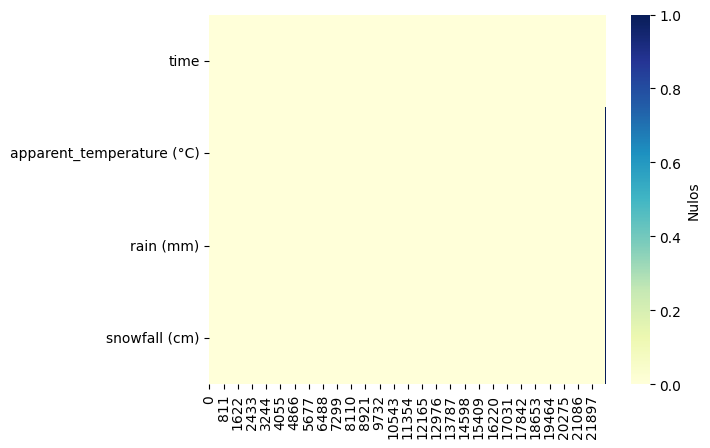

In [3]:
sns.heatmap(df.isna().transpose(), #Visualizamos los nulos, vemos que solo hay algunos faltantes en las fechas mas recientes
            cmap="YlGnBu",
            cbar_kws={'label': 'Nulos'})  

In [4]:
print(df[df.isnull().any(axis=1)]) #Comprobamos esto y procedemos a eliminarlos
df.dropna(axis=0,inplace=True)

                   time  apparent_temperature (°C)  rain (mm)  snowfall (cm)
22652  2023-08-02T20:00                        NaN        NaN            NaN
22653  2023-08-02T21:00                        NaN        NaN            NaN
22654  2023-08-02T22:00                        NaN        NaN            NaN
22655  2023-08-02T23:00                        NaN        NaN            NaN
22656  2023-08-03T00:00                        NaN        NaN            NaN
22657  2023-08-03T01:00                        NaN        NaN            NaN
22658  2023-08-03T02:00                        NaN        NaN            NaN
22659  2023-08-03T03:00                        NaN        NaN            NaN
22660  2023-08-03T04:00                        NaN        NaN            NaN
22661  2023-08-03T05:00                        NaN        NaN            NaN
22662  2023-08-03T06:00                        NaN        NaN            NaN
22663  2023-08-03T07:00                        NaN        NaN            NaN

In [5]:
df.to_csv('..\Datasets_procesados_varios\weather_nyc_temperature_rain_snowfall.csv', index=False)